Episode 0
Episode 10
Episode 20
Episode 30
Episode 40
Episode 50
Episode 60
Episode 70
Episode 80
Episode 90


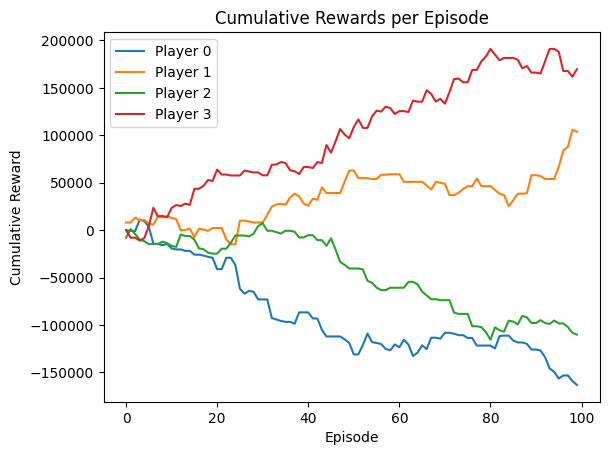

In [1]:
import matplotlib.pyplot as plt
from pyrmj import Game, RandomAgent, ShantenAgent, rule

game = Game(rule({
    "場数": 0,
    "連荘方式": 0,
    "トビ終了あり": False,
    "延長戦方式": 0,
    "一局戦連荘なし": True
}))

agents = [ShantenAgent(), ShantenAgent(), RandomAgent(), ShantenAgent()]
episode_rewards = {player_id: [] for player_id in range(4)}

for episode in range(100):
    if episode % 10 == 0:
        print(f'Episode {episode}')

    observation = game.reset(chiicha=0, save_flag=False)

    while not game.done():
        actions = {
            player_id: agents[player_id].action(obs)
            for player_id, obs in observation.items()
        }
        observation = game.step(actions)

    rewards = game.reward()

    for player_id, reward in rewards.items():
        episode_rewards[player_id].append(reward)

cumulative_rewards = {player_id: [] for player_id in range(4)}

for player_id in range(4):
    total = 0

    for reward in episode_rewards[player_id]:
        total += reward
        cumulative_rewards[player_id].append(total)

for player_id, rewards in cumulative_rewards.items():
    plt.plot(rewards, label=f'Player {player_id}')

plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Rewards per Episode')
plt.legend()
plt.show()